# Inflation!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

**The csv file can be obtained from kaggle (credit goes to HTREHRTHTR) which shows the inflation rate of many countries and regions over many years**

In [3]:
data = pd.read_csv(r"C:\Users\Michaen Ho\anaconda3\Data-Science-Projects\Data-Science-Projects\Inflation data\inflation-consumer.csv")


In [4]:
data.head(10)

,Country,Country Code,Year,Inflation
0,Arab World,ARB,1969,1.303790
1,Arab World,ARB,1970,2.602241
2,Arab World,ARB,1971,6.884719
3,Arab World,ARB,1972,2.496081
4,Arab World,ARB,1973,11.555281
5,Arab World,ARB,1974,26.922679
6,Arab World,ARB,1975,5.599144
7,Arab World,ARB,1976,7.524528
8,Arab World,ARB,1977,9.724012
9,Arab World,ARB,1978,7.441072


In [5]:
data.columns  #check the column headers

Index(['Country', 'Country Code', 'Year', 'Inflation'], dtype='object')

In [6]:
data.dtypes  #check if the types are appropriate(convert if need to)

Country          object
Country Code     object
Year              int64
Inflation       float64
dtype: object

In [7]:
data.shape

(11014, 4)

In [8]:
data.describe()

,Year,Inflation
count,11014.000000,11014.000000
mean,1992.209551,27.776900
std,15.302514,384.965429
min,1961.000000,-98.703831
25%,1980.000000,2.502159
50%,1994.000000,5.680057
75%,2005.000000,10.827582
max,2016.000000,26762.018330


In [9]:
data = data.drop(['Country Code'], axis = 1)  #drop irrelevant columns (remember axis=1 for columns)
data = data.rename(columns={'Country':'Country_Region', 'Inflation':'Inflation Rate'})  #rename column headers (if rename index use index=
data.head(10)

,Country_Region,Year,Inflation Rate
0,Arab World,1969,1.303790
1,Arab World,1970,2.602241
2,Arab World,1971,6.884719
3,Arab World,1972,2.496081
4,Arab World,1973,11.555281
5,Arab World,1974,26.922679
6,Arab World,1975,5.599144
7,Arab World,1976,7.524528
8,Arab World,1977,9.724012
9,Arab World,1978,7.441072


In [10]:
duplicate_row = data[data.duplicated()]
print('no.of duplicate rows: ' , duplicate_row.shape)  #show the number of duplicate rows to remove them if there are any

no.of duplicate rows:  (0, 3)


In [11]:
data.count()  #count the number of non empty entries

Country_Region    11014
Year              11014
Inflation Rate    11014
dtype: int64

In [12]:
data.isnull().sum()  #shows the number of empty entries

Country_Region    0
Year              0
Inflation Rate    0
dtype: int64

**Below is the list of countries and regions found in the dataset**

In [13]:
data.Country_Region.unique()  

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & No

### Compare the inflation rate of Singapore, Malaysia and Thailand from 2010 to 2016

In [14]:
data_sgmyth = data.loc[(data['Country_Region'] == 'Singapore') | (data['Country_Region'] == 'Thailand') | (data['Country_Region'] == 'Malaysia')]
data_recent_years = data_sgmyth.loc[data['Year'] >= 2010]
data_recent_years
#use boolean conditions so that we don't have to set index

,Country_Region,Year,Inflation Rate
7178,Malaysia,2010,7.711944
7179,Malaysia,2011,5.412408
7180,Malaysia,2012,0.999932
7181,Malaysia,2013,0.174474
7182,Malaysia,2014,2.467467
7183,Malaysia,2015,-0.374505
7184,Malaysia,2016,1.951206
9261,Singapore,2010,-0.045988
9262,Singapore,2011,1.233200
9263,Singapore,2012,0.360074


Text(0, 0.5, 'Inflation Rate')

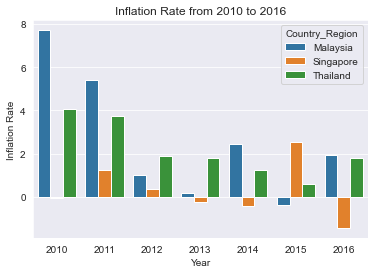

In [15]:
sns.barplot(x = 'Year', y = 'Inflation Rate' , hue = 'Country_Region' , data = data_recent_years)
plt.title('Inflation Rate from 2010 to 2016')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')

**From the bar chart, we can observe that inflation rate generally decreases over the years in these countries. Also, Singapore's inflation rate is the lowest among these countries every year, with the exception in 2015, during which it has the highest rate.**

### Compare the inflation rate between different regions from 2010 to 2016 

In [16]:
data_compare = data.loc[((data['Country_Region'] == 'Europe & Central Asia') | (data['Country_Region'] == 'East Asia & Pacific') | (data['Country_Region'] == 'Latin America & Caribbean')) 
                       & (data['Year'] >= 2010)]
data_compare

,Country_Region,Year,Inflation Rate
201,East Asia & Pacific,2010,3.161444
202,East Asia & Pacific,2011,3.897921
203,East Asia & Pacific,2012,2.392484
204,East Asia & Pacific,2013,1.781058
205,East Asia & Pacific,2014,1.858194
206,East Asia & Pacific,2015,2.141344
207,East Asia & Pacific,2016,2.187415
358,Europe & Central Asia,2010,1.735884
359,Europe & Central Asia,2011,2.568076
360,Europe & Central Asia,2012,2.068571


<AxesSubplot:xlabel='Year', ylabel='Inflation Rate'>

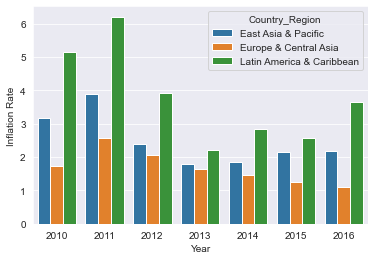

In [17]:
sns.barplot(x='Year', y='Inflation Rate', data = data_compare, hue='Country_Region')

**The inflation rate in these 3 regions generally decrease over the years from 2010 to 2016. Interestingly, for all the years, Europe & Central Asia has the lowest rate, followed by East Asia & Pacific, and then Latin America & Caribbean.**

In [18]:
data_singapore = data.loc[(data['Country_Region'] == 'Singapore') & (data['Year'] >= 2006)]
data_singapore

                          

,Country_Region,Year,Inflation Rate
9257,Singapore,2006,1.719984
9258,Singapore,2007,5.860994
9259,Singapore,2008,-1.491610
9260,Singapore,2009,3.521019
9261,Singapore,2010,-0.045988
9262,Singapore,2011,1.233200
9263,Singapore,2012,0.360074
9264,Singapore,2013,-0.239013
9265,Singapore,2014,-0.409653
9266,Singapore,2015,2.538471


<AxesSubplot:xlabel='Year', ylabel='Inflation Rate'>

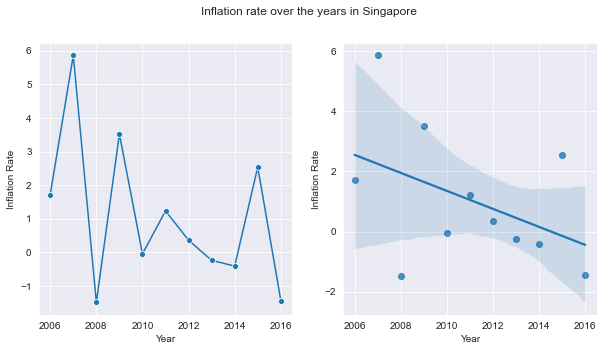

In [25]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Inflation rate over the years in Singapore')
sns.lineplot(ax = axes[0], x='Year', y='Inflation Rate', data = data_singapore, marker = 'o')
sns.regplot(ax=axes[1], x='Year', y='Inflation Rate', data = data_singapore)